In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
from feat_desc import *
import cv2
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda x: "%.3g" % x))
from corner_detector import *
from anms import *
from feat_match import *
from ransac_est_homography import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
img1=cv2.imread('small-middle.jpg')
# img1=cv2.imread('case1.png')
# img1=cv2.imread('rot-middle.jpg')
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray,None)

In [10]:
img2=cv2.imread('small-right.jpg')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp2, des2 = sift.detectAndCompute(gray,None)

In [11]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(des1, des2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

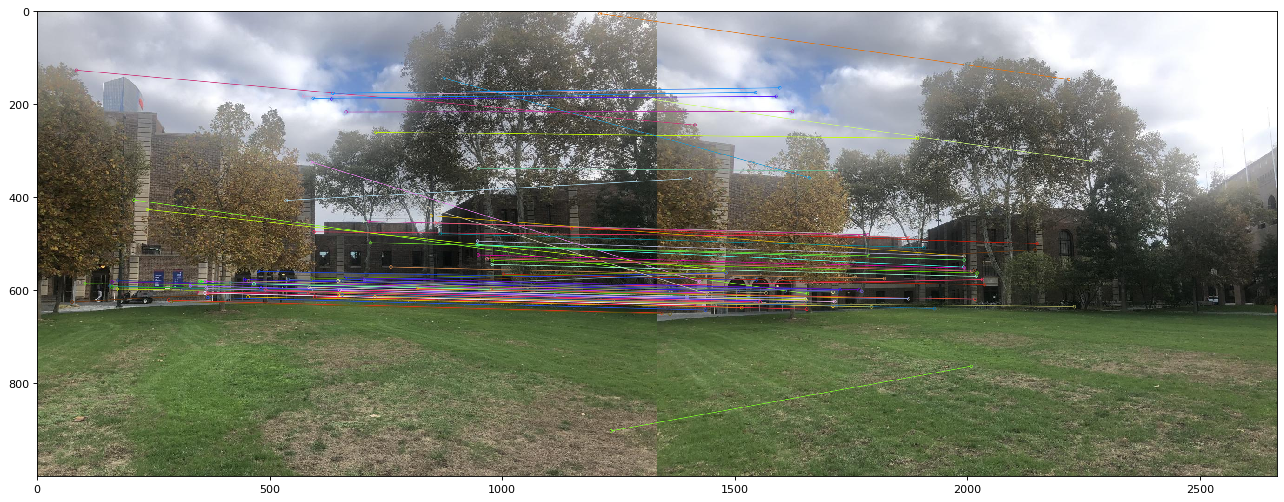

89


In [12]:
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
f=cv2.drawMatches(img1, kp1, img2, kp2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()
print(len(good_matches))

In [13]:
# match,good_matches=feat_match(des1, des2)


89
MaxInlierCount13
89
[[1.36 0.000556 -374]
 [0.229 1.21 -86.4]
 [0.000393 2.21e-05 1]]


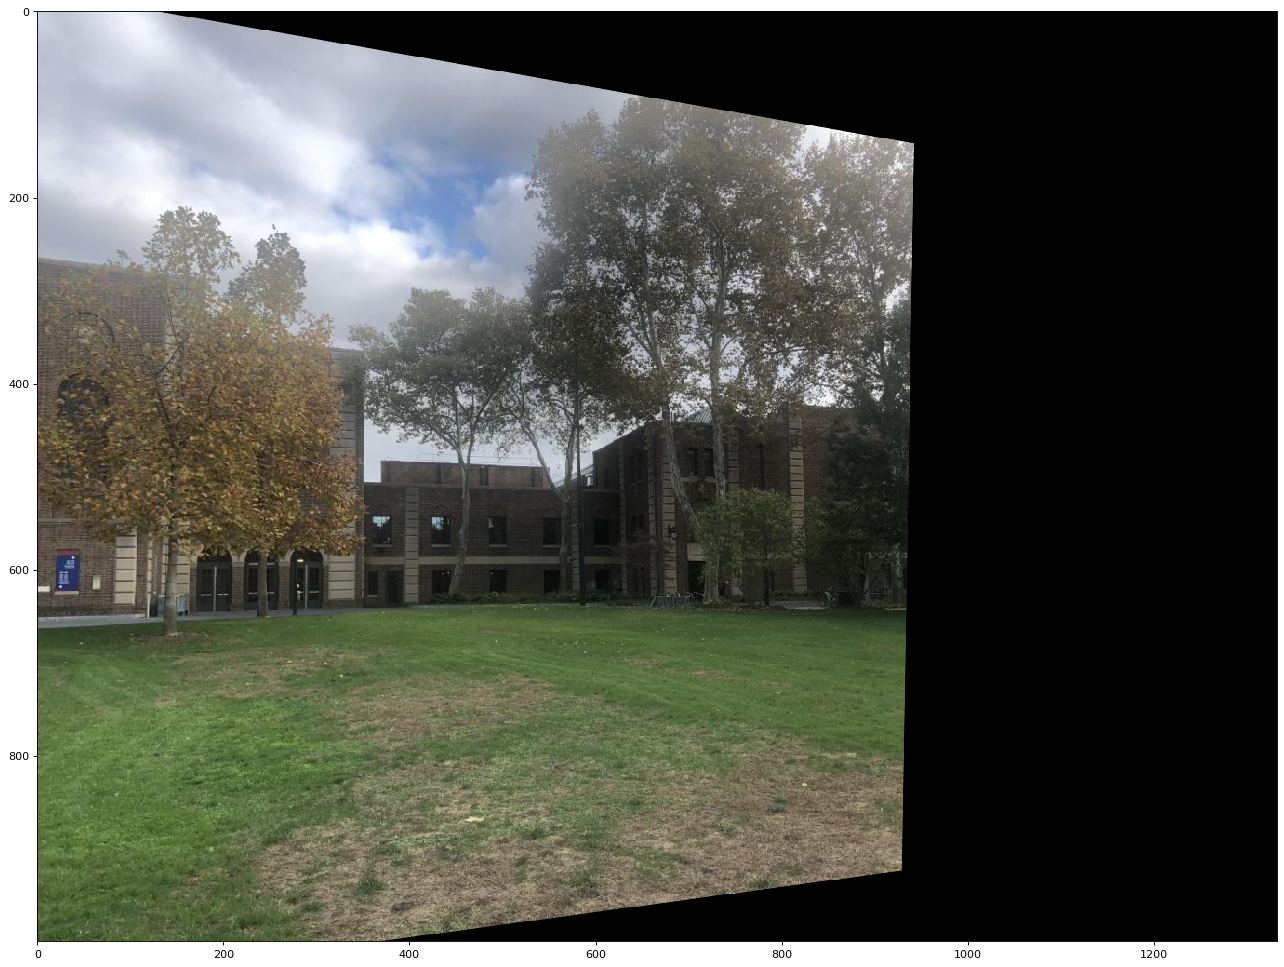

In [16]:
print(len(good_matches))
points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

for i, match in enumerate(good_matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt
# h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

h, inlier_ind=ransac_est_homography(points1[:,0],points1[:,1],points2[:,0],points2[:,1],0.5)
print(len(inlier_ind))
# print(points2[:,0])
print(h)
height, width, channels = img2.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(im1Reg, cv2.COLOR_BGR2RGB))
plt.show()


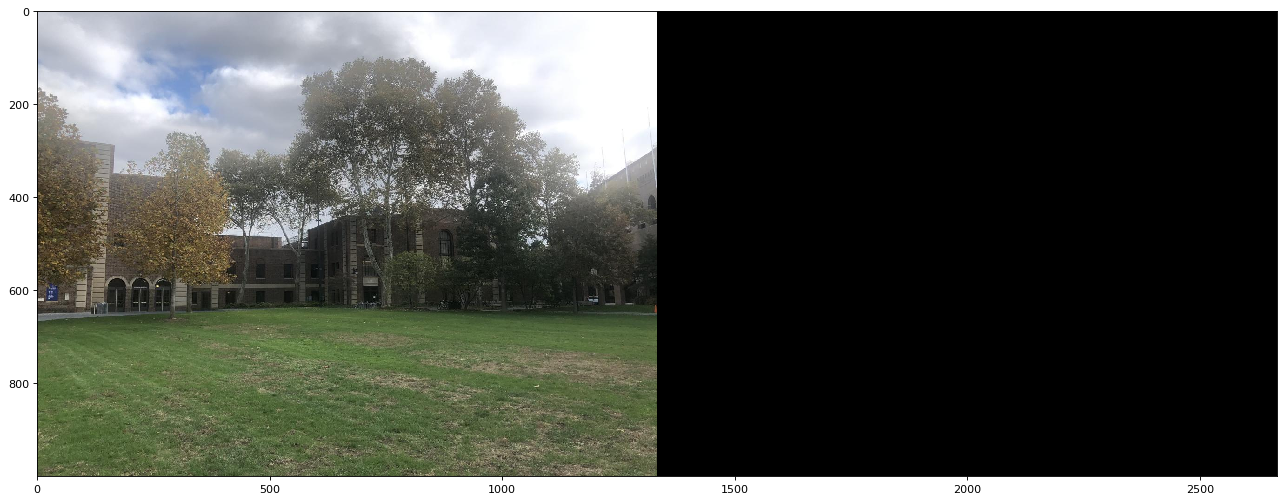

In [26]:
result = cv2.warpPerspective(img1, h,(img1.shape[1] + img2.shape[1], img2.shape[0]))
result[0:img1.shape[0], 0:img2.shape[1]] = img2
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.show()
